# Big Data Mart Sales Problem Project

# Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:
    

--bigdatamart_Train.csv: Use this file for the model building purpose.
    
--bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
training_dataset = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

Instead of downloading the entire training dataset on my local computer I am simply loading the file directly from the GitHub repository link using the raw option.

In [5]:
training_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In the above cell we can see the first five and last five rows of the training dataset which includes the target label "Item_Outlet_Sales" column and the remaining feature columns that determine or help in predicting the sales. Since sales is a continous value it makes this to be a Regression problem!

In [6]:
testing_dataset_original = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

Instead of downloading the entire testing dataset on my local computer I am simply loading the file directly from the GitHub repository link using the raw option.

In [7]:
testing_dataset_original


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


The above cell shows the first five and last five rows of data present in the testing dataset. Unlike the training dataset we do not have the target label present here and therefore consists only the feature columns where the target label which is "Item_Outlet_Sales" to be predicted.

# Exploratory Data Analysis (EDA)

In [8]:
training_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

The list of all the column names and a short description about it.

- Item_Identifier: Unique Product ID

- Item_Weight: Weight of product in grams

- Item_Fat_Content: Whether the product is low fat or not

- Item_Visibility: The percentage of total display area of all products in a store allocated to that particular product

- Item_Type: The category in which the product belongs

- Item_MRP: Maximum Retail Price (list price) of the product

- Outlet_Identifier: Unique Store ID

- Outlet_Establishment_Year: The year in which store was established

- Outlet_Size: The size of the store in terms of ground area coverage

- Outlet_Location_Type: The type of city in which the store is located

- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales: Sales of the product in the particulat store. This is the Outcome/Target data to be predicted.

In [9]:
training_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The columns "Item_Weight" and "Outlet_Size" have missing values that needs to be filled before proceeding on our model creation.

In [10]:
training_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Using the describe method we can take a look at all the numerical data information since all the object data type gets ignored. Here the first column Item_Weight reflects on missing data when compared with the other column counts.


Also I see a gap between the 75% and maximum value for Item_MRP indicating some outlier product with a high price.

In [11]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


With the usage of info method we can take a look at all the columns irrespective of them being numerical or categorical columns. Here we notice that columns Item_Weight and Outlet_Size have missing values that will need to be treated first before making our machine learning model.


The above cell shows that our data set consists of 4 columns with float datatype, 1 column with integer datatype and 7 columns with object datatype.

In [12]:
training_dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

I am checking for the list of all unique data or rows present in the columns avoiding any duplication to see which data contributes lesser variaton than the others.

In [13]:
obj_columns = []
for x in training_dataset.dtypes.index:
    if training_dataset.dtypes[x] == 'object':
        obj_columns.append(x)
        

obj_columns.remove('Item_Identifier')
obj_columns.remove('Outlet_Identifier')

obj_columns


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

I have listed down all the columns that have object data type and removed the columns "Item_Identifier" and "Outlet_Identifier" since they just have the ID details and have no categorical information to offer.

In [14]:
for col in obj_columns:
    print(col)
    print(training_dataset[col].value_counts())
    print("="*40)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Now I have chosen to display all the categorical columns and the values that are present in them as a collective value and the number of rows that are covered by them.


In the column "Item_Fat_Content" we can club the types Low fat, LF, low fat into one single entity as they all represent the low fat information in the products. Similarly Regular and reg can be clubbed into one single entity that would display regular/fat details.


The "Outlet_Size" has 3 categories medium size area, small size area and high/large size area. While the "Outlet_Location_Type" also has 3 categories tier 3, tier 2 and tier 1 showcasing whether it's built in a pricey location or not. Finally the "Outlet_Type" shows 4 categories namely Supermarket Type1, Supermarket Type2, Supermarket Type3 and Grocery Store.

# Filling missing values present in our training dataset.

In [15]:
item_weight_mean = training_dataset.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


As I see that we will need to fill the missing values present in "Item_Weight" column, the first thing I want to perform is check the mean of each product type rather than taking a mean of the either product. I am doing this becuase each product category is different from other and therefore weighs differently too.


So instead of generalizing food, drink, electronics, household items etc weight into one column and taking their mean weight I am bifurcating each product category and then checking for the mean in those to replace the missing words that fall in the same category.

In [16]:
missing_data = training_dataset['Item_Weight'].isnull()

for i, item in enumerate(training_dataset['Item_Identifier']):
    if missing_data[i]:
        if item in item_weight_mean:
            training_dataset['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            training_dataset['Item_Weight'][i] = np.mean(training_dataset['Item_Weight'])

First we are checking the missing data pesent in the "Item_Weight" column that will give out the location of null values that need to be treated and filled with the respective mean values.


Then the for loop helps us in filing the missing data using the if condition where the product category matches the previous data then it takes the mean of only those categorical items and replaces them. In the else part we have collected all the remaining data which do not get covered in our if condition and simply replacing it with the overal mean since there is no specific bifurcation present for it.

In [17]:
training_dataset['Item_Weight'].isnull().sum()

0

We have successfully filled all the missing rows present previouly in the "Item_Weight" column so 1 out of the 2 columns have been treated.

In [18]:
outlet_size_mode = training_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


As mentioned earlier Outlet_Type and Outlet_Size determine the outlet interior therefore we will fill the Outlet_Size missing information by using the mode option that will also extract it's insights on how to repalce the null value keeping Outlet_Type as it's criteria.

In [19]:
missing_val = training_dataset['Outlet_Size'].isnull()
training_dataset.loc[missing_val, 'Outlet_Size'] = training_dataset.loc[missing_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

Here I have identified the missing values present in "Outlet_Size" column and then replaced it with the mode value which was previously analyzed using the "Outlet_Type" column to bifurcate the data and add the correct or appropriate option.

In [20]:
training_dataset['Outlet_Size'].isnull().sum()

0

Now we have successfully filled the 2nd missing data column as well using the mode option as this was a categorical column.

In [21]:
sum(training_dataset['Item_Visibility']==0)

526

After looking at the "Item_Visibility" column I saw that there are no null values in it but there are 526 rows with 0 as it's data that again does not make any sense therefore I will try replacing those values with the mean value of that column.

In [22]:
training_dataset.loc[:, 'Item_Visibility'].replace([0], [training_dataset['Item_Visibility'].mean()], inplace=True)

In the "Item_Visibility" visibility column I am only replacing all the 0 values with the mean value of it's entire column. The parameter inplace helps us in making the changes to the column directly instead of having to use the re assignment feature.

In [23]:
sum(training_dataset['Item_Visibility']==0)

0

We can confirm that there are no 0 values present in the "Item_Visibility" column even though the mean data has risen atleast it is better than having 0 as the information.

In [24]:
training_dataset['Item_Fat_Content'] = training_dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
training_dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Since the "Item_Fat_Content" column had similar categories and was better to club those data we have used the dictionary option and replaced the LF and low fat option to Low Fat while the reg has been clubbed with Regular option making only 2 options than the previous 5 categories.

# Adding more columns/categories from the existing one's

In [25]:
training_dataset['New_Item_Type'] = training_dataset['Item_Identifier'].apply(lambda x: x[:2])
training_dataset['New_Item_Type'] = training_dataset['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
training_dataset['New_Item_Type'].value_counts()


Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In "Item_Identifier" column we had prefixes such as FD, DR and NC that indicated towards the type of product that was being sold. Hence we created a new column that that had these categories tagged as Food, Drinks and Non Consumable to make the model understand better the types they fall in.

In [26]:
training_dataset.loc[training_dataset['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
training_dataset['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Similarly with the usage of Non Consumable category for the newly created column we are adding an extra category to our exisiting column "Item_Fat_Content" which is tagged as Non Edible.

In [27]:
training_dataset['Outlet_Years'] = 2013 - training_dataset['Outlet_Establishment_Year']
training_dataset['Outlet_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Years, dtype: int64

To reduce the only integer column present in our dataset to a lesser value that would not make our model biased eventually we are reducing the year of establishment after comparing it with the year of data collection that is 2013.

In [28]:
training_dataset = training_dataset.drop("Outlet_Establishment_Year", axis=1)
training_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


As we have created the new "Outlet_Years" column that contains the information of how many years it has been for the outlet being built till the year of data collection we are dropping the original "Outlet_Establishment_Year" column.

In [29]:
training_dataset.skew()

Item_Weight          0.090561
Item_Visibility      1.286877
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
Outlet_Years         0.396641
dtype: float64

I am taking a look at the skewness information for all the numerical datatype columns and I can see that columns "Item_Weight", "Item_Visibility" and "Item_Outlet_Sales" are out of the acceptable skewness range of +/-0.5. Since "Item_Outlet_Sales" is our target column we can ignore it completely but for the other two columns right now I will retain the entire information even though it is indicating towards the presence of outliers in it's skewed data.


If required I will treat the outliers to improve my model accuracy else I will continue to include all the data without losing any information.

# Visualization

# Count Plots

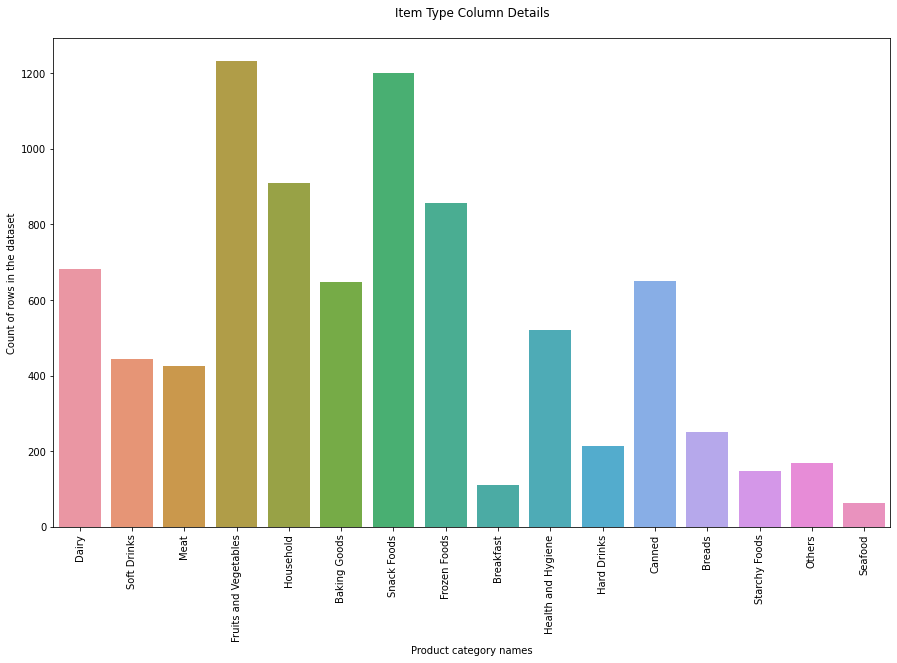

In [30]:
plt.figure(figsize=(15,9))
values = list(training_dataset['Item_Type'].unique())
diag = sns.countplot(training_dataset["Item_Type"])
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Item Type Column Details\n")
plt.xlabel("Product category names")
plt.ylabel("Count of rows in the dataset")
plt.show()

In the above count plt we see all the categorical product names present in the Item_Type column and it's value counts present in the dataset given us an insight on how Fruits/Vegetables and Snack foods are the highest number of product present in the outlet since they get sold at a larger number it needs to be stocked up accordingly.

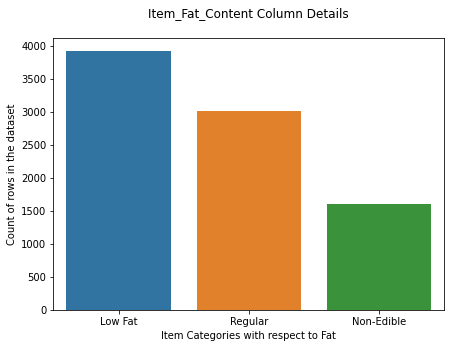

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Item_Fat_Content"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Item Categories with respect to Fat")
plt.title("Item_Fat_Content Column Details\n")
plt.show()

The fat content details present in the products are being depicted using the visual representation wherein the numbers of low fat is higher than the regular product and non edible items will obviously have nothing to do with it's fat content so it is on a lower scale.

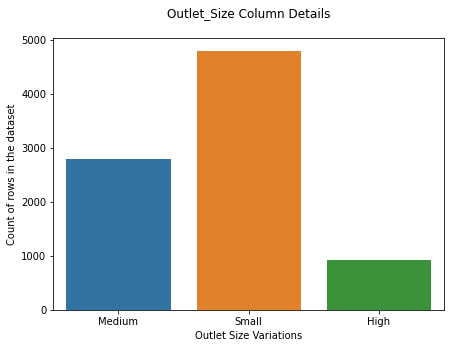

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Outlet_Size"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Size Variations")
plt.title("Outlet_Size Column Details\n")
plt.show()

The above count plot gives us a visual representation on the Outlet Size data where small size outlets are higher when compared to the others and large size outlets are very less in numbers.

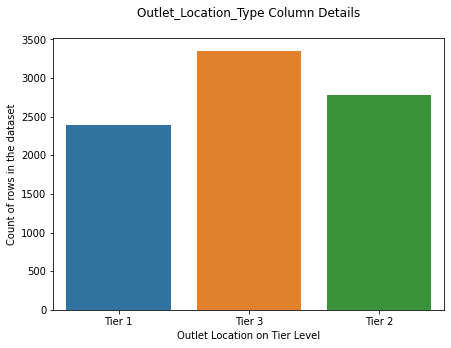

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Outlet_Location_Type"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Location on Tier Level")
plt.title("Outlet_Location_Type Column Details\n")
plt.show()

The count plot made for Outlet Location shows us the different tier types and looks like Tier 3 has the highest value then comes Tier 2 and finally Tier 1 being the most expensive style to be built upon depending upon the location, area size and expense to make it.

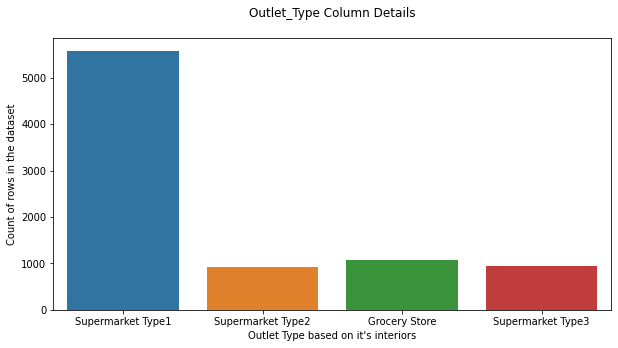

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(training_dataset["Outlet_Type"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Type based on it's interiors")
plt.title("Outlet_Type Column Details\n")
plt.show()

Finally the count plot made for Outlet Type reveals the different category of outlet ranging from Supermarket Type1, Supermarket Type2, Supermarket Type3 and Grocery Store. The plot shows that Supermarket Type1 is the highest and possibly the most used architecture type for Big Data Mart retail store.

# Pair Plot

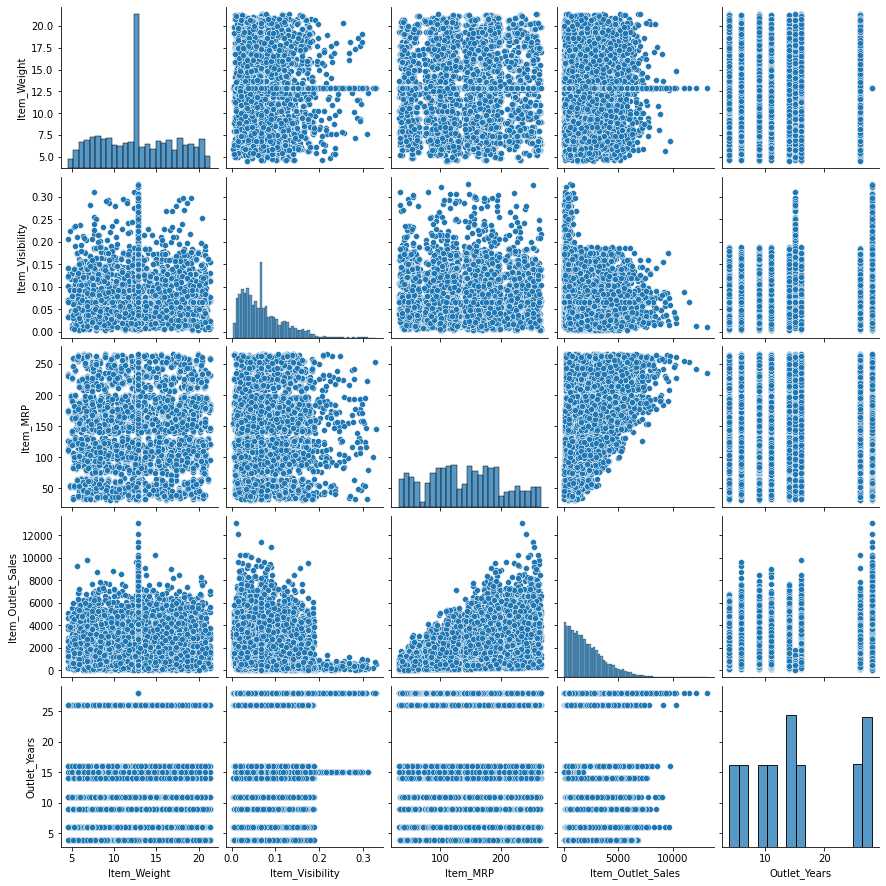

In [35]:
sns.pairplot(training_dataset)

The above pairplot considers only numerical data therefore all the object datatype columns have been skipped from the representation. Also the column "Outlet_Years" can be ignored since it only provides the number of year when the outlet was built. Checking through the scatterplots we see lots of data point convergence towards the centre due to the replacement of values using the mean option.

# Box Plot

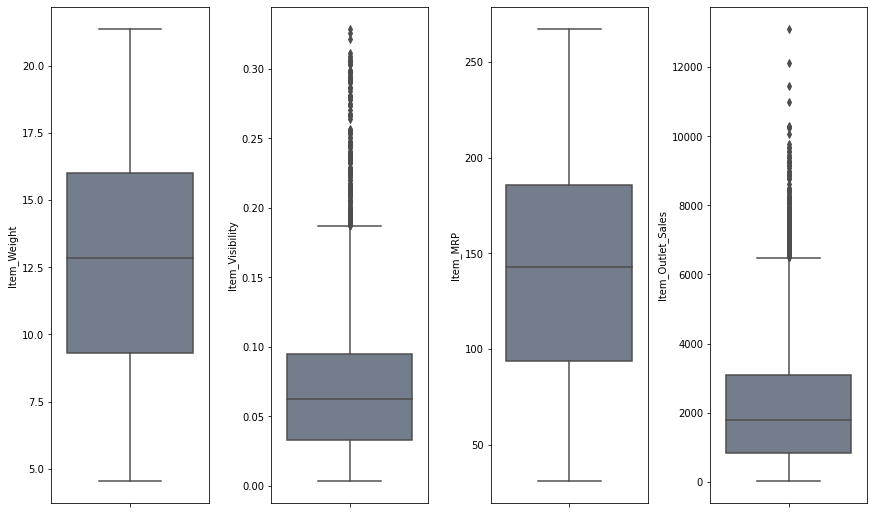

In [36]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in training_dataset[numeric_column_names].items():
    sns.boxplot(y=col, data=training_dataset, ax=ax[index], palette="bone")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

The box plot representation shows us that there are outliers present in 2 columns but since they are like continous data points I believe our model should not face any issue due to it.

# Distribution Plot

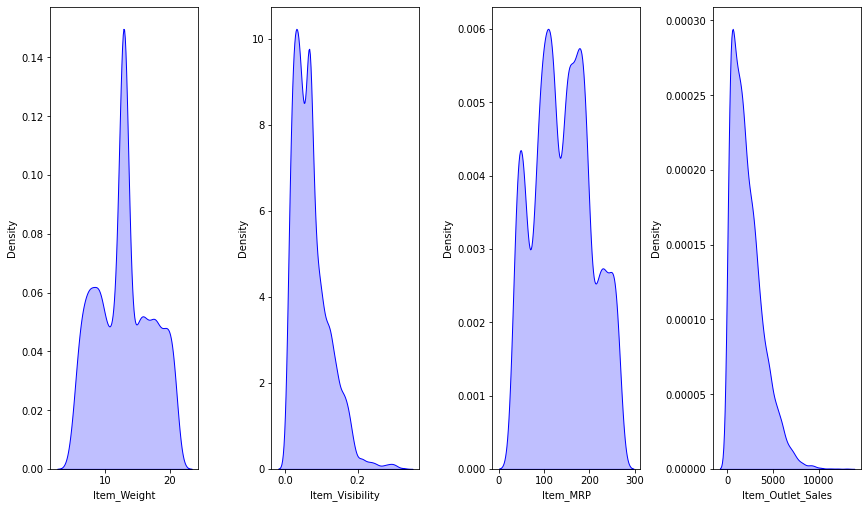

In [38]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in training_dataset[numeric_column_names].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

I see that the distribution plot created for the numeric data columns show the normal distribution format for all of them. The right skewness present in "Item_Visibility" is due to the continous outlier data points that I wish to retain instead of removing it and treating the bell shape curve format retention.


# Correlation using a Heatmap

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

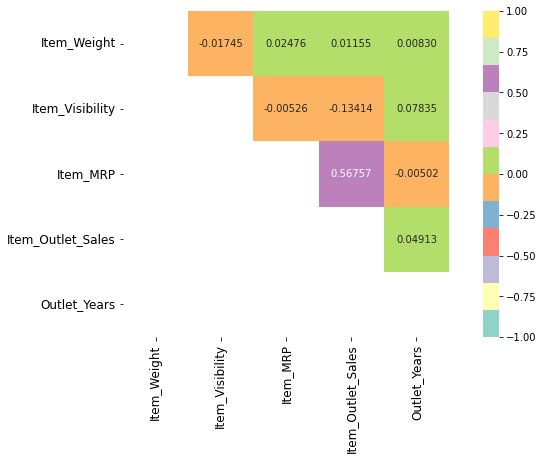

In [39]:
lower_triangle = np.tril(training_dataset.corr())
plt.figure(figsize=(12,6))
sns.heatmap(training_dataset.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="Set3", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

With the help of a correlation heatmap we can see that the Sales column has a high relation with MRP which makes sense because the price of a product ultimately derives the sale inside a retail store. I see that all the other numeric columns are very less impactful when it comes to a positive or negative correlation with the Sales data.

# Log Transformation on the Target Label column 

In [40]:
# log transformation on "Item_Outlet_Sales" column

training_dataset['Item_Outlet_Sales'] = np.log(1+training_dataset['Item_Outlet_Sales'])

# Encoding

In [41]:
training_dataset = training_dataset.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

Before applying any encoding method I have removing the columns Item_Identifier and Outlet_Identifier as they were just providing the ID information.

In [42]:
label_encoder = LabelEncoder()
col_name = ["Item_Type"]
for col in col_name:
    training_dataset[col] = label_encoder.fit_transform(training_dataset[col])

I am using label encoding only on "Item_Type" as it had lots of categories and if I used one hot encoding on it then the number of columns would have increased a lot.

In [43]:
training_dataset = pd.get_dummies(training_dataset, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
training_dataset

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.300,0.016047,4,249.8092,8.225808,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,6.096776,4,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,7.648868,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,6.597664,15,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,6.903451,26,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,7.929984,26,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,6.310436,11,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,7.085159,9,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,7.521100,4,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


I am using the pandas get_dummies feature which uses One Hot Encoding in the background to convert all the categorical values into numeric data increasing the number of columns as well.

# Heatmap 

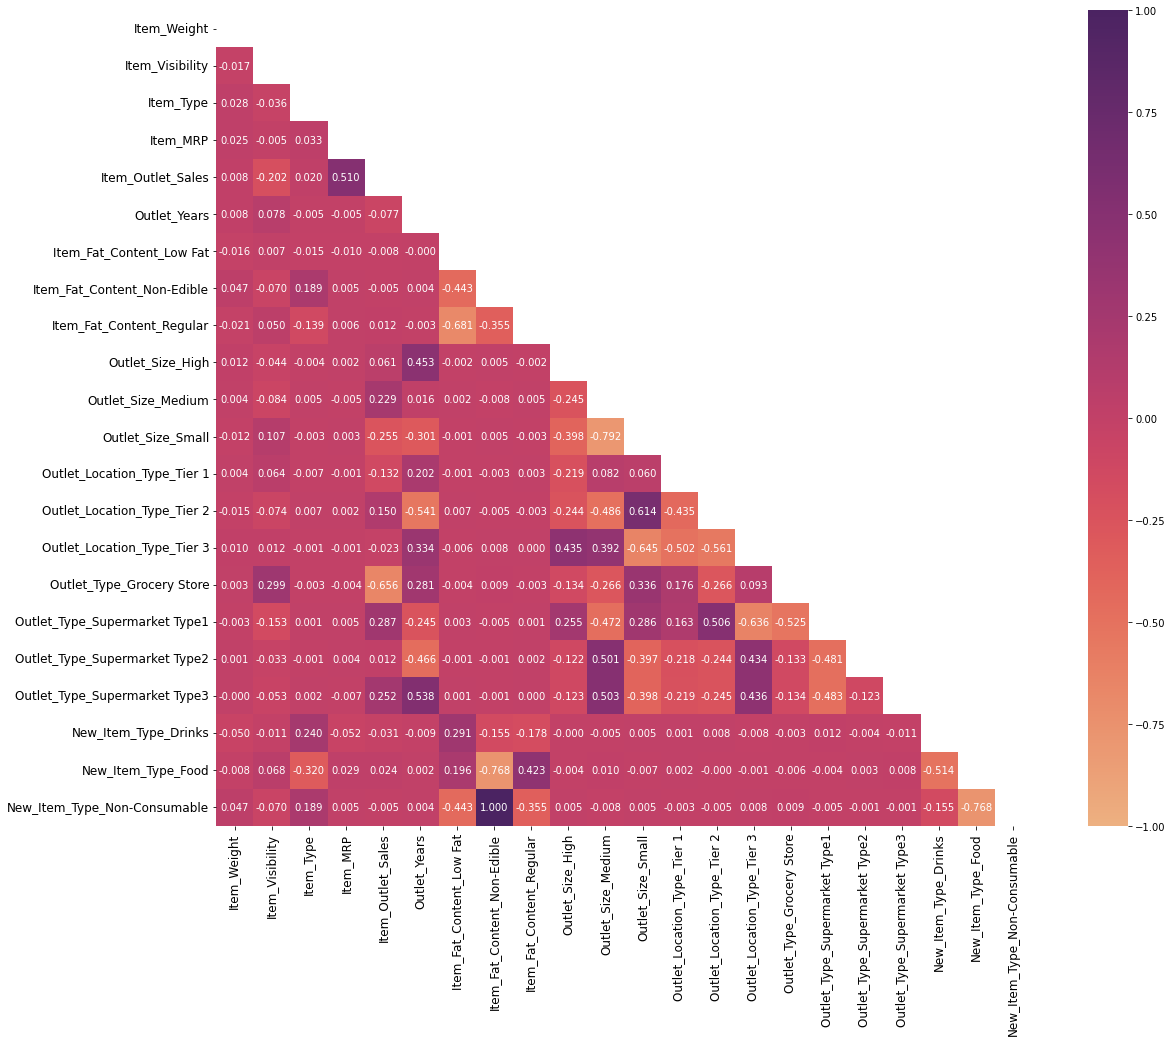

In [45]:
triangle = np.triu(training_dataset.corr())
plt.figure(figsize=(20,15))
sns.heatmap(training_dataset.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="flare", mask=triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Since the column "Item_Fat_Content_Non-Edible" has been derived from "New_Item_Type_Non-Consumable" they are showing to be positively correlated with each other. Rest other columns have their variations and Sales is showing to be highly dependent on MRP, Super Market Type, Outlet Size, Outlet Tier as compared to the rest of the columns in our dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [46]:
X = training_dataset.drop('Item_Outlet_Sales', axis=1)
Y = training_dataset['Item_Outlet_Sales']

I have separated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Feature Scaling

In [47]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,-0.841872,-1.111358,-0.766479,1.747454,-0.139541,1.084133,-0.480558,-0.738147,-0.350395,1.432326,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.641706,-1.045067,1.608963,-1.489023,-1.334103,-0.922396,-0.480558,1.354743,-0.350395,1.432326,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558
2,1.098554,-1.096733,0.658786,0.010040,-0.139541,1.084133,-0.480558,-0.738147,-0.350395,1.432326,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
3,1.500838,-0.083740,-0.291391,0.660050,-0.020085,-0.922396,-0.480558,1.354743,-0.350395,-0.698165,...,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
4,-0.929428,-0.083740,0.421242,-1.399220,1.293934,-0.922396,2.080915,-0.738147,2.853918,-0.698165,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.371418,1.180783,1.293934,1.084133,-0.480558,-0.738147,2.853918,-0.698165,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8519,-1.059578,-0.476643,-1.716656,-0.527301,-0.497909,-0.922396,-0.480558,1.354743,-0.350395,-0.698165,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8520,-0.534243,-0.718672,0.183698,-0.897208,-0.736822,-0.922396,2.080915,-0.738147,-0.350395,-0.698165,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
8521,-1.336444,1.538968,1.371418,-0.607977,-1.334103,-0.922396,-0.480558,1.354743,-0.350395,1.432326,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,-0.321627,0.625708,-0.480558


I am using the Standard Scaler method to normalize my feature values and ensure that my model does not have any kind of biasness towards a particular column value.

# Creating the training and testing data sets 

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=111)

I am taking 30 percent of the complete dataset for training purpose and the remaing 70 percent with be used to train the machine learning models.

# Machine Learning Model for Regression and Evaluation Metrics

In [49]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=111)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [50]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)


RMSE Score is: 0.5409189820148305
R2 Score is: 72.14812316919522
Cross Validation Score: 71.8541822311933
R2 Score - Cross Validation Score is 0.29394093800191


Created the Linear Regression model and checked it's evaluation metrics.

In [51]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.5544770391561245
R2 Score is: 70.73441866765855
Cross Validation Score: 70.65717388604487
R2 Score - Cross Validation Score is 0.07724478161367188


Created the Support Vector Regression model and checked it's evaluation metrics.

In [52]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.8826612530205776
R2 Score is: 25.83856125204048
Cross Validation Score: 26.278880799095607
R2 Score - Cross Validation Score is -0.4403195470551253


Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [53]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.7635712698168583
R2 Score is: 44.50048597107948
Cross Validation Score: 45.194863666065096
R2 Score - Cross Validation Score is -0.6943776949856186


Created the Random Forest Regressor model and checked it's evaluation metrics.

In [54]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.7399618316347528
R2 Score is: 47.87948967873441
Cross Validation Score: 44.44113437350726
R2 Score - Cross Validation Score is 3.438355305227148


Created the K Neighbors Regressor model and checked it's evaluation metrics.

In [55]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.7915901747424194
R2 Score is: 40.352696926873236
Cross Validation Score: 40.095080518297735
R2 Score - Cross Validation Score is 0.25761640857550105


Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [56]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.5836665264468279
R2 Score is: 67.57204244424543
Cross Validation Score: 67.17889606772813
R2 Score - Cross Validation Score is 0.39314637651729356


Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [57]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.5617960623999458
R2 Score is: 69.95671596525058
Cross Validation Score: 68.897754077753
R2 Score - Cross Validation Score is 1.0589618874975741


Created the Extra Trees Regressor model and checked it's evaluation metrics.

# Hyper parameter tuning

In [58]:
# Choosing Support Vector Regression

fmod_param = {'kernel' : ["linear", "rbf"],
              'gamma' : ["scale", "auto"],
              'C' : [2.0, 4.0],
              'epsilon' : [0.2, 0.4]
             }

After comparing all the regression models I have selected Support Vector Regression as my best model and have listed down it's parameters above referring the sklearn webpage.

In [59]:
GSCV = GridSearchCV(SVR(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [60]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [2.0, 4.0], 'epsilon': [0.2, 0.4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [61]:
GSCV.best_params_

{'C': 2.0, 'epsilon': 0.4, 'gamma': 'auto', 'kernel': 'rbf'}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [62]:
Final_Model = SVR(C=2.0, epsilon=0.4, gamma="auto", kernel="rbf")
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)


R2 score for the Best Model is: 72.70825420209216


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# Pre processing the Testing Dataset to predict the Sales column

In [63]:
testing_dataset = testing_dataset_original.copy()
testing_dataset


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Checking the testing data set contents with it's rows and columns.

In [64]:
# filling missing data in the testing dataset for column "Item_Weight"

item_weight_mean = testing_dataset.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
missing_data = testing_dataset['Item_Weight'].isnull()
for i, item in enumerate(testing_dataset['Item_Identifier']):
    if missing_data[i]:
        if item in item_weight_mean:
            testing_dataset['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            testing_dataset['Item_Weight'][i] = np.mean(testing_dataset['Item_Weight'])
            
# filling missing data in the testing dataset for column "Outlet_Size"

outlet_size_mode = testing_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_val = testing_dataset['Outlet_Size'].isnull()
testing_dataset.loc[missing_val, 'Outlet_Size'] = testing_dataset.loc[missing_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

# filling zero values in the testing dataset for column "Item_Visibility"

testing_dataset.loc[:, 'Item_Visibility'].replace([0], [testing_dataset['Item_Visibility'].mean()], inplace=True)

Filling the missing data in columns Item_Weight and Outlet_Size. Also replacing all the zero values present in Item_Visibility column with it's mean value.

In [65]:
# Clubbing similar data rows together for column "Item_Fat_Content" using replace

testing_dataset['Item_Fat_Content'] = testing_dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
testing_dataset['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Clubbing similar data rows together for column "Item_Fat_Content" using replace option

In [66]:
# Creating a new column named "New_Item_Type" and adding proper categories using map

testing_dataset['New_Item_Type'] = testing_dataset['Item_Identifier'].apply(lambda x: x[:2])
testing_dataset['New_Item_Type'] = testing_dataset['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
testing_dataset['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

Creating a new column named "New_Item_Type" and adding proper categories using map option

In [67]:
# Creating a new column named "Item_Fat_Content" and adding proper categories

testing_dataset.loc[testing_dataset['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
testing_dataset['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

Creating a new column named "Item_Fat_Content" and adding proper categorical rows

In [68]:
# Creating a new column named "Outlet_Years" and removing the column "Outlet_Establishment_Year" that was used to derive it

testing_dataset['Outlet_Years'] = 2013 - testing_dataset['Outlet_Establishment_Year']
testing_dataset = testing_dataset.drop("Outlet_Establishment_Year", axis=1)

Creating a new column named "Outlet_Years" and removing the column "Outlet_Establishment_Year" that was used to derive the new column

In [69]:
# Dropping the ID columns "Item_Identifier" and "Outlet_Identifier"

testing_dataset = testing_dataset.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

Removing the ID columns "Item_Identifier" and "Outlet_Identifier" that do not provide much input in sales prediction

In [70]:
# Label Encoder

label_encoder = LabelEncoder()
col_name = ["Item_Type"]
for col in col_name:
    testing_dataset[col] = label_encoder.fit_transform(testing_dataset[col])

# One Hot Encoder
testing_dataset = pd.get_dummies(testing_dataset, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

Using encoding techniques such as Label Encoder and One Hot Encoder to convert object data type values to numeric data

In [71]:
# Feature Scaling on all testing dataset rows

scaler = StandardScaler()
testing_dataset = pd.DataFrame(scaler.fit_transform(testing_dataset), columns=testing_dataset.columns)

Applying Standard Scaler method on all the feature columns present in the testing data to ensure we are able to predict unbiased target variable

# Prediction Results

In [72]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset

Predicted_Sales = Final_Model.predict(testing_dataset)

# Reversing the Log Transformation that was performed on the Target column while training the ML Model

Predicted_Sales = np.exp(Predicted_Sales)
Predicted_Sales

array([1365.09631794, 1283.87899782,  688.70578532, ..., 1824.98209269,
       3899.6970082 , 1040.41504471])

I am using my Hyper Parameter Tuned Final ML Model to predict the sales of the test dataset that was provided containing only the feature columns.

Also I have reversed the Log Transformation that was performed on my Target variable while training my Final ML Model. The data has been saved in the variable called "Predicted_Sales" and the output is showed in truncated format.

# Converting the sales output back in CSV format

In [73]:
predicted_output = pd.DataFrame()
predicted_output['Item_Outlet_Sales']=Predicted_Sales
predicted_output

,Item_Outlet_Sales
0,1365.096318
1,1283.878998
2,688.705785
3,2479.607371
4,5250.971037
...,...
5676,2148.907900
5677,2776.566389
5678,1824.982093
5679,3899.697008


Here I am adding the predicted sales output to our original test dataset to complete it with features and target column.

In [74]:
predicted_output.to_csv("Predicted_Sales_Data.csv", index=False)

With the help of to_csv I have exported the entire dataset in comma separated values format that can be checked using the Excel spreadsheet program.

# Saving the best model

In [75]:
filename = "FinalModel_big data mart sales.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_big data mart sales.pkl']

Finally, I am saving my best regression model using the joblib library.